In [20]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
# Basic URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | lorengau
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | taoudenni
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | coahuayana
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | bria
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | zhigansk
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | bengkulu
Processing Record 13 of Set 1 | shache
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | rio gallegos
Processing Record 16 of Set 1 | constitucion
Processing Record 17 of Set 1 | harper
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | manzanillo
Processing Record 20 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | tiksi
Processing Record 23 of Set 1 | keffi
Processing Record 24 of Set 1 | ma

Processing Record 35 of Set 4 | tocopilla
Processing Record 36 of Set 4 | oktyabrskoye
Processing Record 37 of Set 4 | namatanai
Processing Record 38 of Set 4 | sao filipe
Processing Record 39 of Set 4 | aden
Processing Record 40 of Set 4 | aswan
Processing Record 41 of Set 4 | chake chake
Processing Record 42 of Set 4 | ngukurr
City not found. Skipping...
Processing Record 43 of Set 4 | nemuro
Processing Record 44 of Set 4 | visby
Processing Record 45 of Set 4 | salinas
Processing Record 46 of Set 4 | pilar
Processing Record 47 of Set 4 | oloron-sainte-marie
Processing Record 48 of Set 4 | kaitangata
Processing Record 49 of Set 4 | paramonga
Processing Record 50 of Set 4 | bonthe
Processing Record 1 of Set 5 | berdigestyakh
Processing Record 2 of Set 5 | iqaluit
Processing Record 3 of Set 5 | saint-philippe
Processing Record 4 of Set 5 | berdyuzhye
City not found. Skipping...
Processing Record 5 of Set 5 | dunedin
Processing Record 6 of Set 5 | taksimo
Processing Record 7 of Set 5 | v

Processing Record 27 of Set 8 | hay river
Processing Record 28 of Set 8 | tingo maria
Processing Record 29 of Set 8 | esil
Processing Record 30 of Set 8 | souillac
Processing Record 31 of Set 8 | weligama
Processing Record 32 of Set 8 | tessalit
Processing Record 33 of Set 8 | kenora
Processing Record 34 of Set 8 | farafangana
Processing Record 35 of Set 8 | ankazobe
Processing Record 36 of Set 8 | mahibadhoo
Processing Record 37 of Set 8 | hit
Processing Record 38 of Set 8 | kalamakion
City not found. Skipping...
Processing Record 39 of Set 8 | umm ruwabah
City not found. Skipping...
Processing Record 40 of Set 8 | umuarama
Processing Record 41 of Set 8 | pingliang
Processing Record 42 of Set 8 | bluefield
Processing Record 43 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 44 of Set 8 | arroio dos ratos
Processing Record 45 of Set 8 | zyryanka
Processing Record 46 of Set 8 | aklavik
Processing Record 47 of Set 8 | nhulunbuy
Processing Record 48 of Set 8 | hambanto

Processing Record 16 of Set 12 | ruteng
Processing Record 17 of Set 12 | orchard homes
Processing Record 18 of Set 12 | riyadh
Processing Record 19 of Set 12 | mestia
Processing Record 20 of Set 12 | magdalena
Processing Record 21 of Set 12 | saint-pierre
Processing Record 22 of Set 12 | hensall
Processing Record 23 of Set 12 | yunjinghong
City not found. Skipping...
Processing Record 24 of Set 12 | normandin
Processing Record 25 of Set 12 | winslow
Processing Record 26 of Set 12 | daragutan
Processing Record 27 of Set 12 | trinidad
Processing Record 28 of Set 12 | grindavik
Processing Record 29 of Set 12 | cowra
Processing Record 30 of Set 12 | bismarck
Processing Record 31 of Set 12 | opuwo
Processing Record 32 of Set 12 | pascagoula
Processing Record 33 of Set 12 | san quintin
Processing Record 34 of Set 12 | hasaki
Processing Record 35 of Set 12 | terney
Processing Record 36 of Set 12 | cardston
Processing Record 37 of Set 12 | ust-tsilma
Processing Record 38 of Set 12 | ola
Proces

In [9]:
#tally # of cities that made it to city_data
len(city_data)

566

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lorengau,-2.0226,147.2712,82.67,76,99,2.95,PG,2022-02-13 23:19:06
1,Mataura,-46.1927,168.8643,62.47,48,37,2.28,NZ,2022-02-13 23:23:10
2,Taoudenni,22.6783,-3.9836,62.38,25,0,11.07,ML,2022-02-13 23:21:08
3,Puerto Ayora,-0.7393,-90.3518,76.55,90,91,1.99,EC,2022-02-13 23:23:11
4,Albany,42.6001,-73.9662,23.27,55,100,8.37,US,2022-02-13 23:18:33
5,Coahuayana,18.7333,-103.6833,94.48,42,96,6.31,MX,2022-02-13 23:23:12
6,Bethel,41.3712,-73.4140,29.05,67,100,6.91,US,2022-02-13 23:17:13
7,Bria,6.5423,21.9863,74.17,23,49,4.07,CF,2022-02-13 23:23:12
8,Tasiilaq,65.6145,-37.6368,21.36,93,100,14.36,GL,2022-02-13 23:21:52
9,Zhigansk,66.7697,123.3711,-37.35,100,56,1.54,RU,2022-02-13 23:18:15


In [16]:
#reordering columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
ordered_city_data_df=city_data_df[new_column_order]

#removing index column
#ordered_city_data_df.set_index('City',inplace=True)
ordered_city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lorengau,PG,2022-02-13 23:19:06,-2.0226,147.2712,82.67,76,99,2.95
1,Mataura,NZ,2022-02-13 23:23:10,-46.1927,168.8643,62.47,48,37,2.28
2,Taoudenni,ML,2022-02-13 23:21:08,22.6783,-3.9836,62.38,25,0,11.07
3,Puerto Ayora,EC,2022-02-13 23:23:11,-0.7393,-90.3518,76.55,90,91,1.99
4,Albany,US,2022-02-13 23:18:33,42.6001,-73.9662,23.27,55,100,8.37
...,...,...,...,...,...,...,...,...,...
561,Fort Saint James,CA,2022-02-13 23:39:35,54.4333,-124.2500,34.47,98,100,1.48
562,Kargil,IN,2022-02-13 23:39:36,34.5667,76.1000,0.91,95,100,1.45
563,Roald,NO,2022-02-13 23:37:34,62.5833,6.1333,38.91,93,100,18.41
564,Houma,US,2022-02-13 23:37:35,29.5958,-90.7195,55.40,30,0,9.22


In [17]:
ordered_city_data_df.dtypes

City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

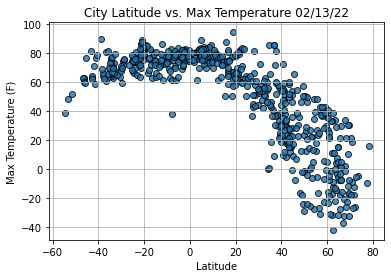

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

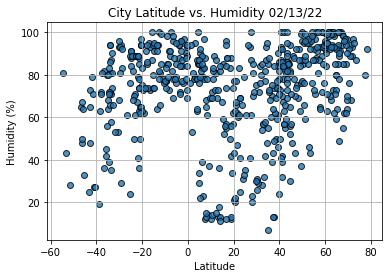

In [22]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

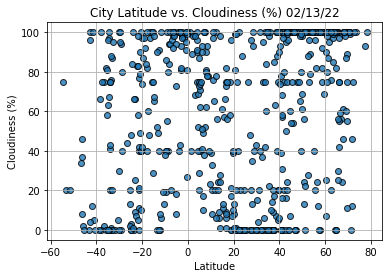

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

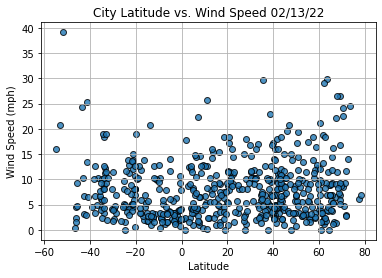

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()